# Polar Area Chart
````{card}

<br/>

::::{grid} 2

:::{grid-item}
:columns: 3
:class: sd-m-auto
<img src="../../images/polararea.png" width="300px"/>

:::

:::{grid-item}
:columns: 8
Also called: Coxcomb chart, Rose chart, Polar Area Chart

The Polar Area chart is similar to a usual pie chart, except sectors are equal angles and differ rather in how far each sector extends from the center of the circle. The polar area diagram is used to plot cyclic phenomena (e.g., count of deaths by month).

<br/>

Functions:

{bdg-info-line}`Comparison` {bdg-info-line}`Trend over time`

:::
::::

+++

Credits: 
[DataVizProject](https://datavizproject.com/about/)

````

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
data = {'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Value': [100, 200, 150, 300, 320, 400, 380, 500, 800, 450]}
df = pd.DataFrame(data, columns=['Year', 'Value'])
df.head()

,Year,Value
0,2013,100
1,2014,200
2,2015,150
3,2016,300
4,2017,320


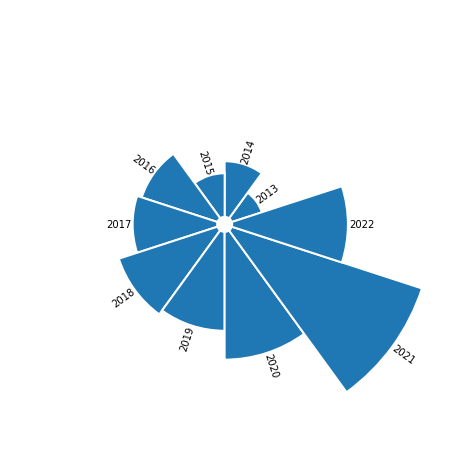

In [36]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')


upperLimit = 100
lowerLimit = 30
max = df['Value'].max()
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit
width = 2*np.pi / len(df.index)
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor='white')

labelPadding = 4
for bar, angle, height, label in zip(bars,angles, heights, df['Year']):
    rotation = np.rad2deg(angle)
    alignment = ''
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = 'right'
        rotation = rotation + 180
    else: 
        alignment = 'left'
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode='anchor') 